# Lead scoring case study by P. Jaya Vineela, Palak Paliwal & Parimal Manoj

## Problem statement

X Education, an online education platform, aims to improve its lead conversion rate by identifying and prioritizing the most promising leads. The company currently faces a low conversion rate, despite generating a significant number of leads.

To address this issue, We are building a predictive model that assigns a lead score to each potential customer. This score reflects the likelihood of a lead converting into a paying customer, allowing the sales team to focus their efforts on the most promising prospects.

Specifically, we will be doing th following:

- Analyze a dataset of past leads, including various attributes such as lead source, time spent on website, and total visits.
- Build a logistic regression model to predict the probability of a lead converting.
- Assign a lead score between 0 and 100 to each lead based on the predicted conversion probability.
- Evaluate the model's performance and make recommendations for improving lead conversion.
  

## Goals of the Case Study
There are quite a few goals for this case study:

- To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- To adjust to if the company's requirement changes in the future so you will need to handle these as well.


## Steps to solve the problem

- Read and understand the data
- Clean the data
- Analysing the data
- Prepare the data for Model Building
- Model Building
- Model Evaluation
- Making Predictions on the Test Set


### Importing required libararies

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix,precision_score, recall_score ,precision_recall_curve


### 1. Read and understand the data

In [2]:
# loading the dataset using pandas 
leads_data = pd.read_csv("leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# using .shape to know about total number of rows and columns in the data
leads_data.shape

(9240, 37)

In [4]:
# Inspect the data using into() method of pandas library for viewing details about whole data like if it has missing values, its data type, columns info
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# using .describe() to know about numeric columns of the data
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Clean the data

In [6]:
# Checking the value_counts for all the columns
for col in leads_data:
    print(leads_data[col].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


In [7]:
leads_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

#### There are a few columns with only one value so all users have same attribute. We can remove them as we don't get any useful info from them.

In [8]:
# Dropping unique valued columns 
leads_cleaned= leads_data.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [9]:
# Replacing 'Select' with NaN - Since it means no option is selected  and we don't get any useful data from it
leads_cleaned = leads_cleaned.replace('select',np.nan)

In [10]:
# checking for missing values
leads_cleaned.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [11]:
# Checking the percentage of missing values
round(100*(leads_cleaned.isnull().sum()/len(leads_cleaned.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
# We can remove the columns with more than 20% null values and also columns such as City, country, How did you hear us etc. which have less meaning
leads_cleaned = leads_cleaned.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number', 'Prospect ID'],axis=1)
leads_cleaned.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [13]:
# re-evaluating the % of missing values
round(100*(leads_cleaned.isnull().sum()/len(leads_cleaned.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.

In [14]:
leads_cleaned['Specialization'] = leads_cleaned['Specialization'].fillna('not provided') 
leads_cleaned['What matters most to you in choosing a course'] = leads_cleaned['What matters most to you in choosing a course'].fillna('not provided')
leads_cleaned['Country'] = leads_cleaned['Country'].fillna('not provided')
leads_cleaned['What is your current occupation'] = leads_cleaned['What is your current occupation'].fillna('not provided')
leads_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [15]:
# re-evaluating the % of missing values
round(100*(leads_cleaned.isnull().sum()/len(leads_cleaned.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [16]:
# removing the small percent of missing values
leads_cleaned = leads_cleaned[leads_cleaned.isnull().sum(axis=1) <1]
leads_cleaned.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
A free copy of Mastering The In

In [17]:
# All missing values are handles now! Now lets handle other categorial columns

In [18]:
leads_cleaned['Country'].value_counts()

Country
India                   6491
not provided            2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [19]:
# lets replace countries other than india as other countries 
def replace_country(x):
    country= ""
    if x== "India":
        country= "India"
    elif x== "not provided":
        country = "not provided"
    else:
        country = "outside India"
    return country
leads_cleaned['Country'] = leads_cleaned.apply(lambda x:replace_country(x['Country']), axis = 1)
leads_cleaned['Country'].value_counts()

Country
India            6491
not provided     2296
outside India     287
Name: count, dtype: int64

In [20]:
# Checking the value_counts for all the columns
for col in leads_cleaned:
    print(leads_cleaned[col].astype('category').value_counts())
    print('___________________________________________________')

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
___________________________________________________
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
___________________________________________________
Do Not Email
No     8358
Yes     716
Name: count, dtype: int64
___________________________________________________
Do Not Call
No     9072
Yes    

### Analysing the data - EDA

#### Univariate Analysis

In [21]:
leads_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [22]:
cols = leads_cleaned.columns
cols2 = ['Lead Source', 'Last Activity', 'Specialization', 'Last Notable Activity']


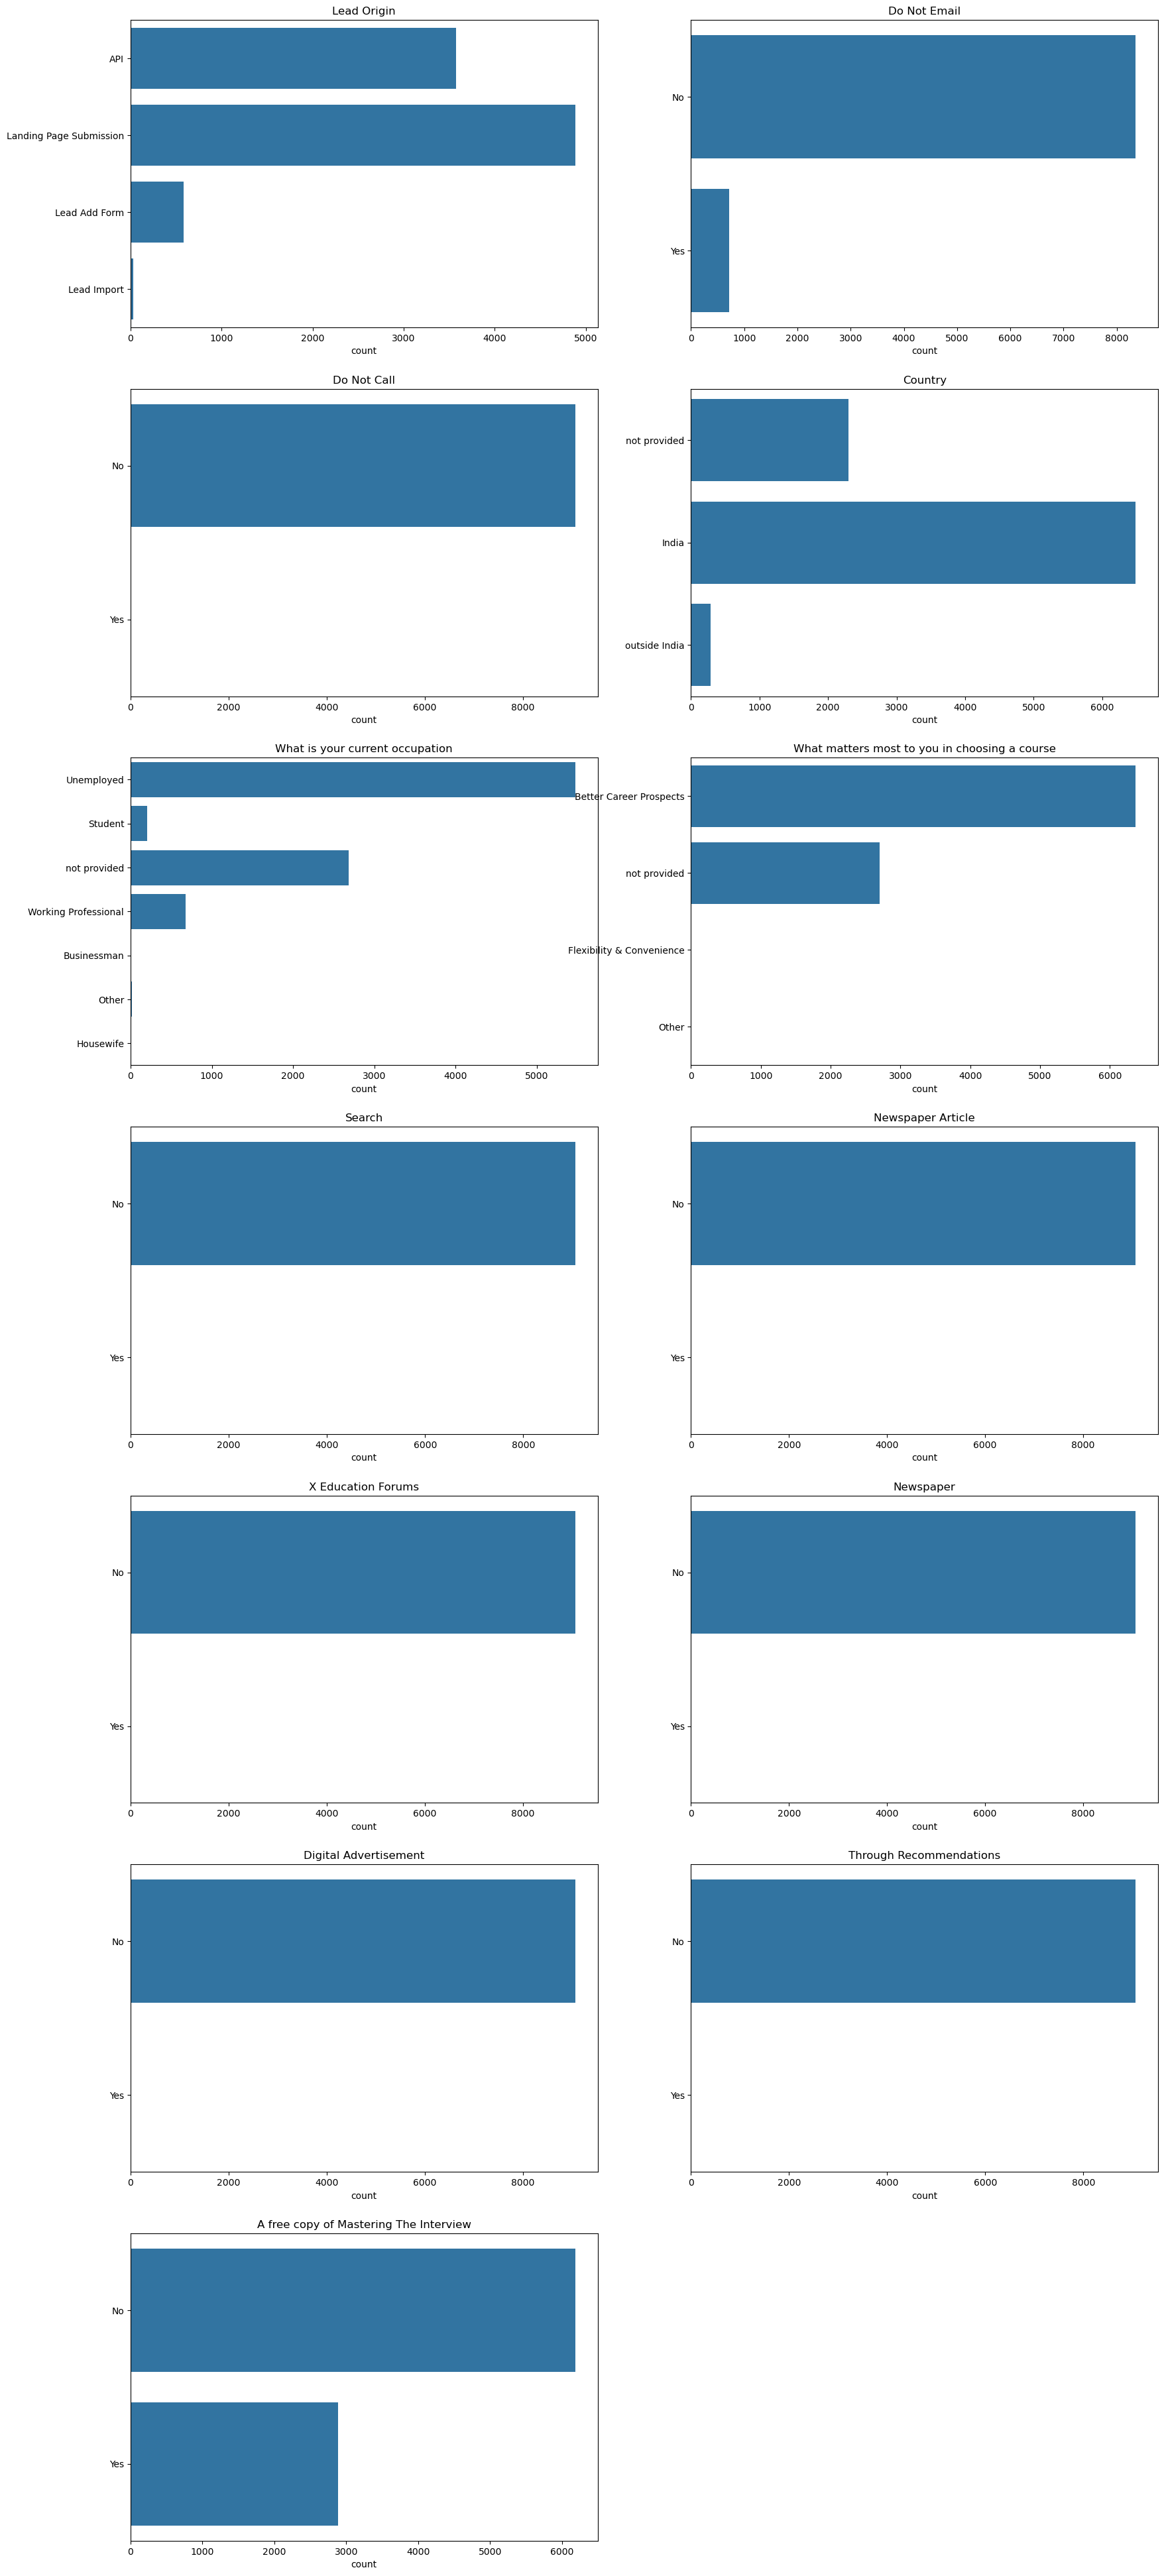

In [23]:

plt.figure(figsize = (20,100))
i=1
for col in cols:
    if leads_cleaned[col].dtype == 'object' and col not in cols2:
        plt.subplot(14,2,i)
        sns.countplot(leads_cleaned[col])
        plt.title(col)
        plt.ylabel("")
        i=i+1

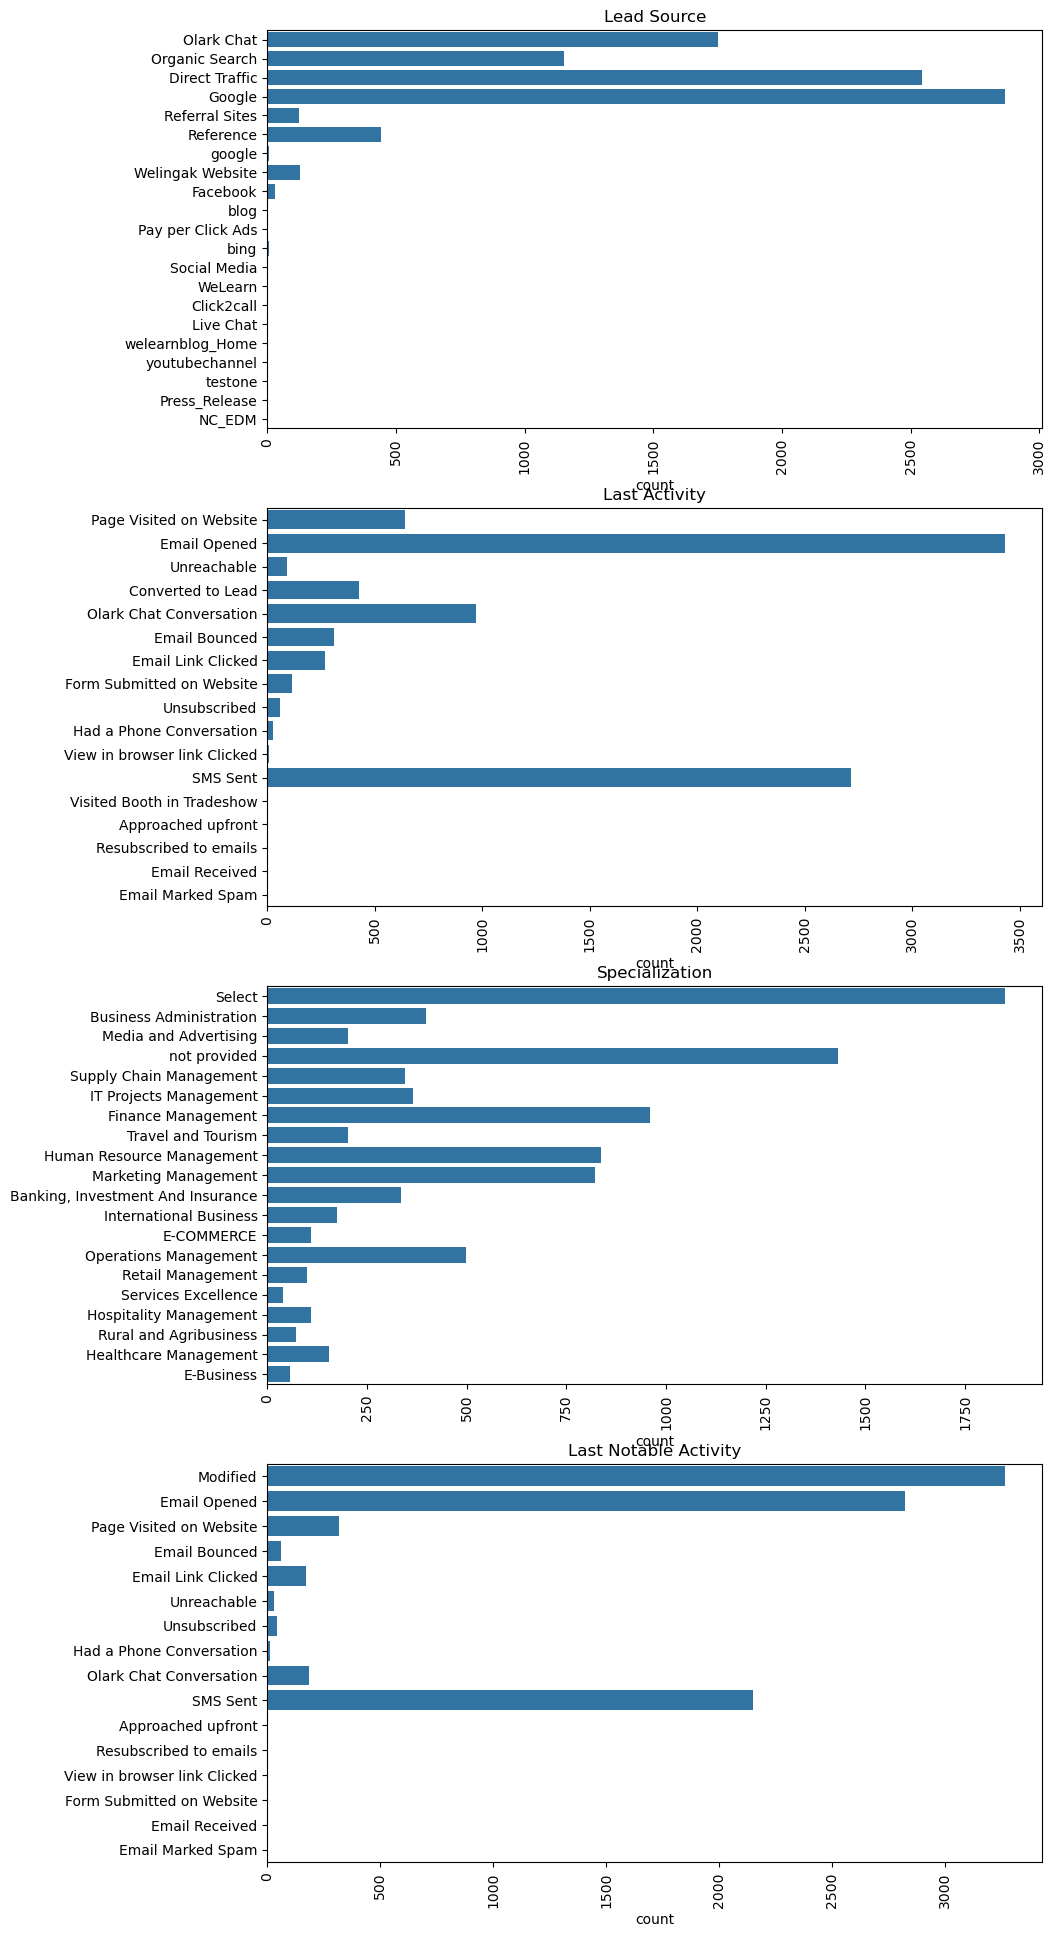

In [24]:
i=1
plt.figure(figsize = (10,30))
for col in cols2:
    plt.subplot(5,1,i)
    sns.countplot(leads_cleaned[col]).tick_params(axis='x', rotation = 90)
    plt.title(col)
    plt.ylabel("")
    i=i+1

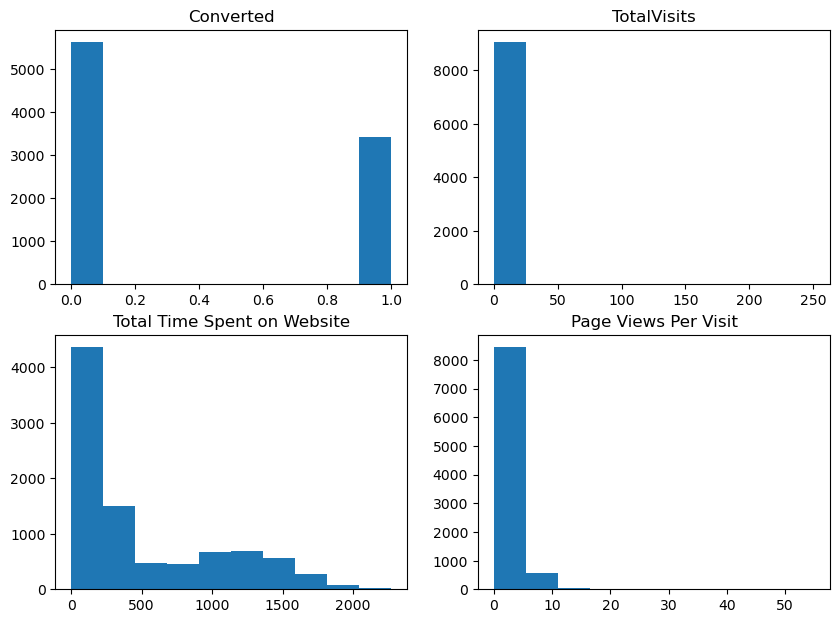

In [25]:
# numerical columns
plt.figure(figsize = (10,35))
i=1
cols = leads_cleaned.columns
for col in cols:
    if leads_cleaned[col].dtype != 'object':
        plt.subplot(9,2,i)
        plt.hist(leads_cleaned[col], bins = 10)
        plt.title(col)
        i=i+1

#### Bivariate Analysis

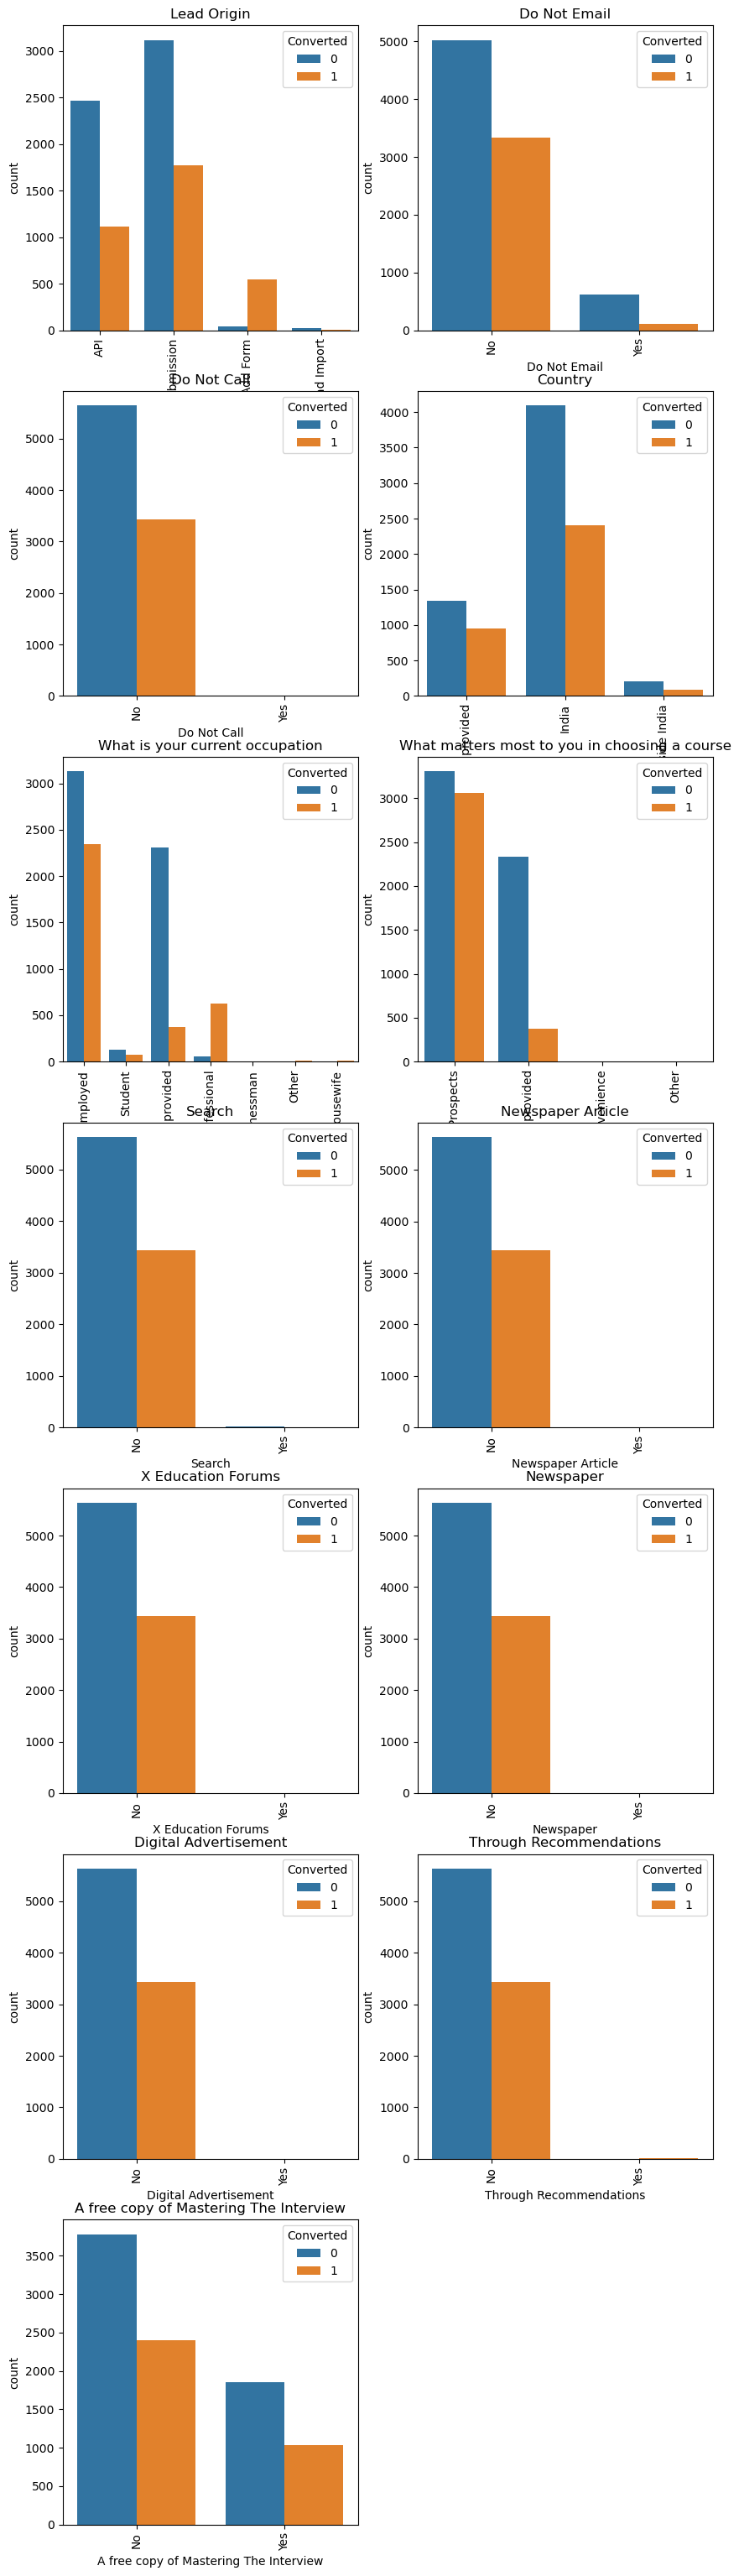

In [26]:
# analysing all columns with converted (target) column
plt.figure(figsize = (10,50))

i=1
for col in cols:
    if leads_cleaned[col].dtype == 'object' and col not in cols2:
        plt.subplot(9,2,i)
        sns.countplot(x=col, hue='Converted', data= leads_cleaned).tick_params(axis='x', rotation = 90)
        plt.title(col)
        i=i+1


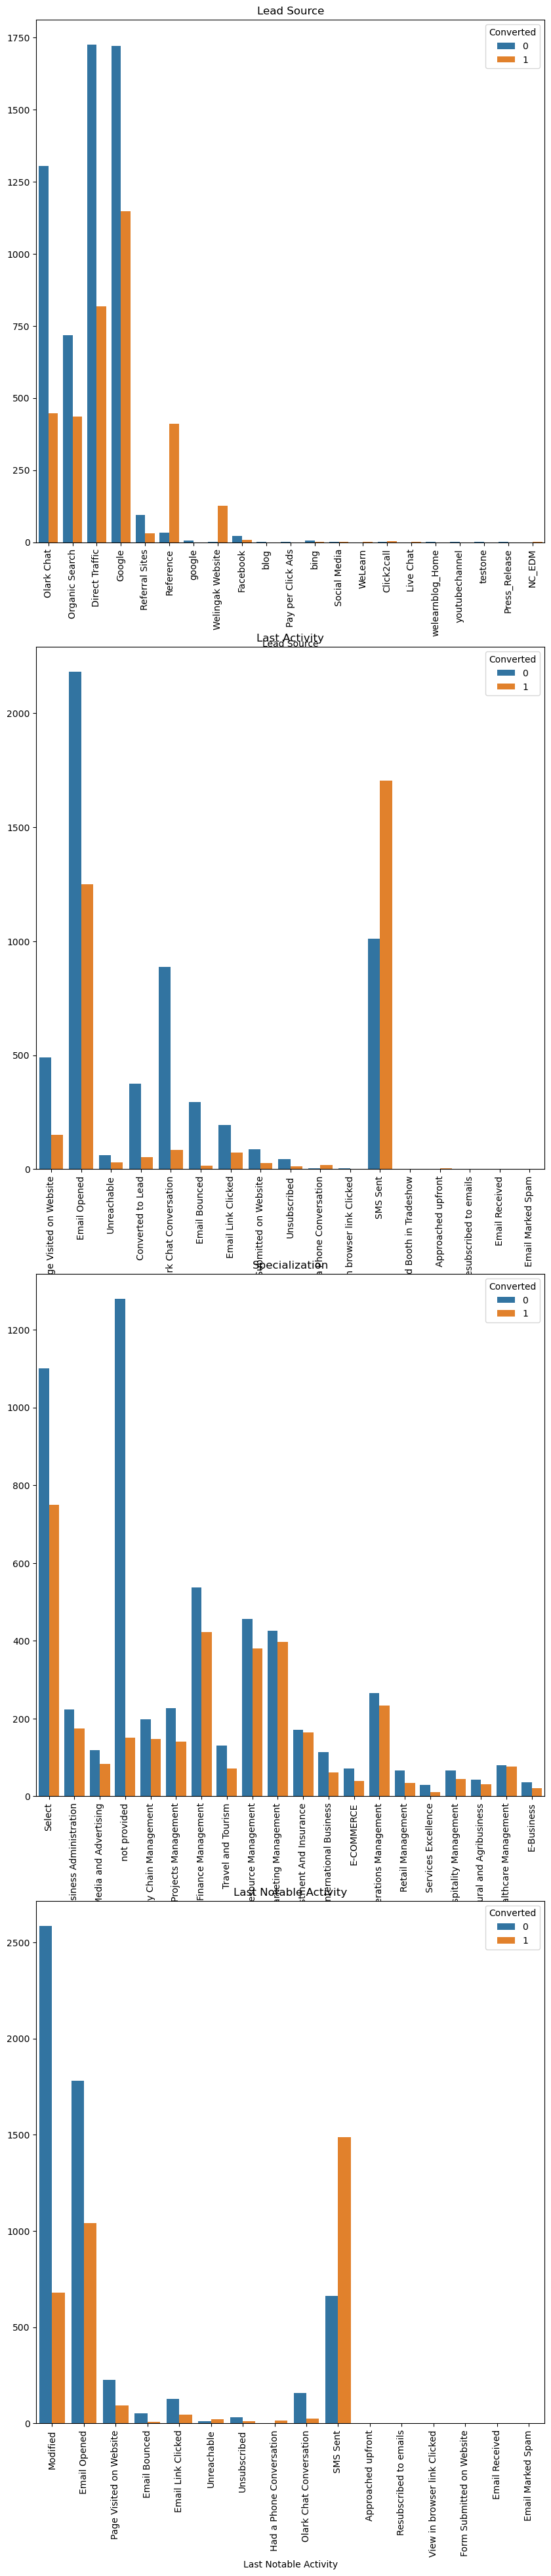

In [27]:
i=1
plt.figure(figsize = (10,60))
for col in cols2:
    plt.subplot(5,1,i)
    sns.countplot(x=col, hue='Converted', data= leads_cleaned).tick_params(axis='x', rotation = 90)
    plt.title(col)
    plt.ylabel("")
    i=i+1

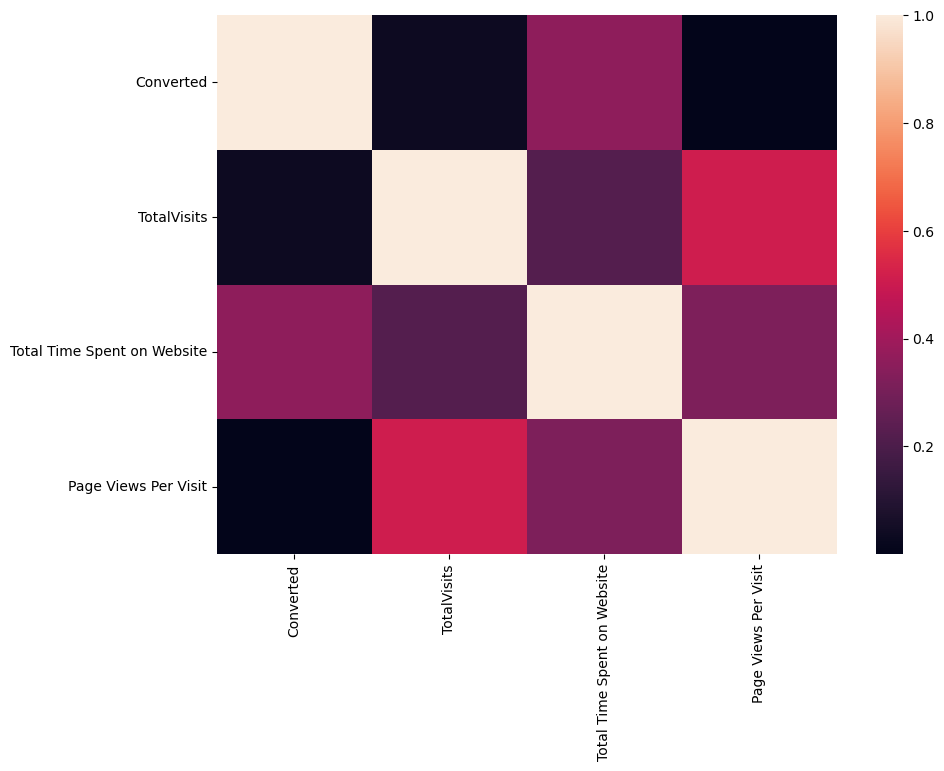

In [28]:
# To check the correlation among varibles
numeric_cols = [i for i in leads_cleaned if leads_cleaned[i].dtype != 'object']
plt.figure(figsize=(10,7))
sns.heatmap(leads_cleaned[numeric_cols].corr())
plt.show()

#### You can see that there is relatively less correlation between the numeric vcolumns of the dataset

In [29]:
leads_cleaned[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
max,251.000000,2272.000000,55.000000


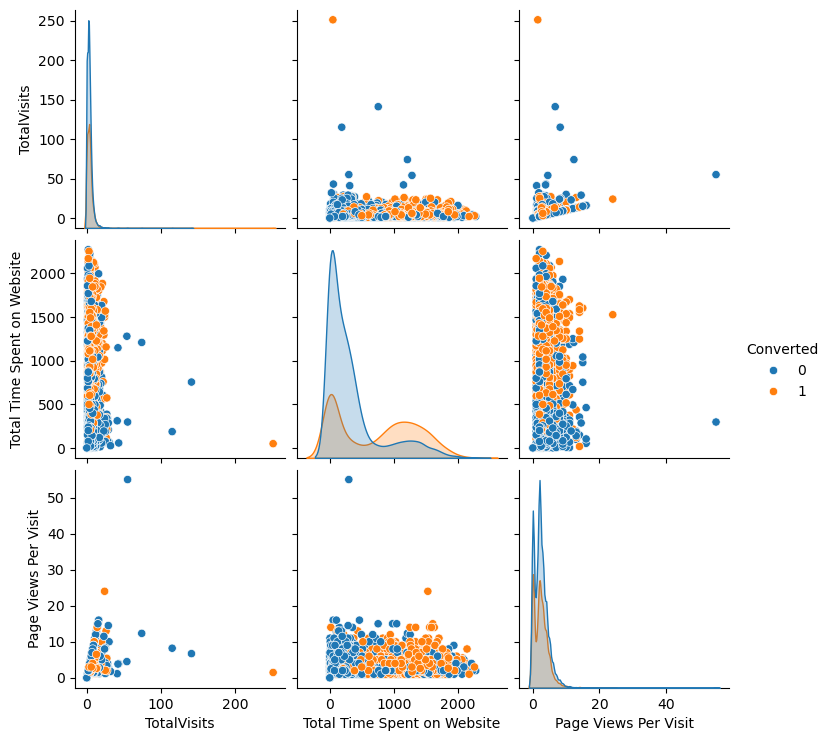

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(leads_cleaned,diag_kind='kde',hue='Converted')
plt.show()

#### There aren't any major outliers, so moving on to analysis


### Prepare the data for Model Building

### a. Dummy variables 

In [31]:
# Checking the value_counts for all the columns
for col in leads_cleaned:
    print(leads_cleaned[col].astype('category').value_counts())
    print('___________________________________________________')

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
___________________________________________________
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
___________________________________________________
Do Not Email
No     8358
Yes     716
Name: count, dtype: int64
___________________________________________________
Do Not Call
No     9072
Yes    

- Do Not Call,Search, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations these columns have very skewed data, the yes is in 10's when the no is 9000 records. So we can ignore them while converting to dummy values

In [32]:
leads_cleaned.loc[:, leads_cleaned.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [33]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads_cleaned[['Lead Origin' ,'Lead Source', 'Do Not Email', 'Last Activity','Country', 'Specialization', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
leads_final_dummy = pd.concat([leads_cleaned, dummy], axis=1)
leads_final_dummy

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,False,False,True,False,False,False,False,False,False,False
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,False,False,False,False,False,False,False,False,False,False
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,False,False,False,False,False,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,False,False,True,False,False,False,False,False,False,False
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,outside India,...,False,False,False,False,False,False,False,False,False,False
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,False,False,False,False,False,False,True,False,False,False
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,False,False,False,False,False,False,True,False,False,False
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,False,False,False,False,False,False,True,False,False,False


In [34]:
leads_final_dummy = leads_final_dummy.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)
leads_final_dummy

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.00,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.00,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9236,0,2.0,238,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9237,0,2.0,199,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9238,1,3.0,499,3.00,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


### b. Train test split

In [35]:
# All columns except Converted column will be taken into x
X = leads_final_dummy.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False


In [36]:
# Putting the target variable in y
y = leads_final_dummy['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [37]:
# Split the dataset into 70:30 for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=120)

### c. Scaling the training data

In [38]:
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1618,0.000000,0.000000,0.000000,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7718,0.023904,0.140845,0.054545,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2273,0.000000,0.000000,0.000000,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
835,0.007968,0.587148,0.036364,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
8945,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


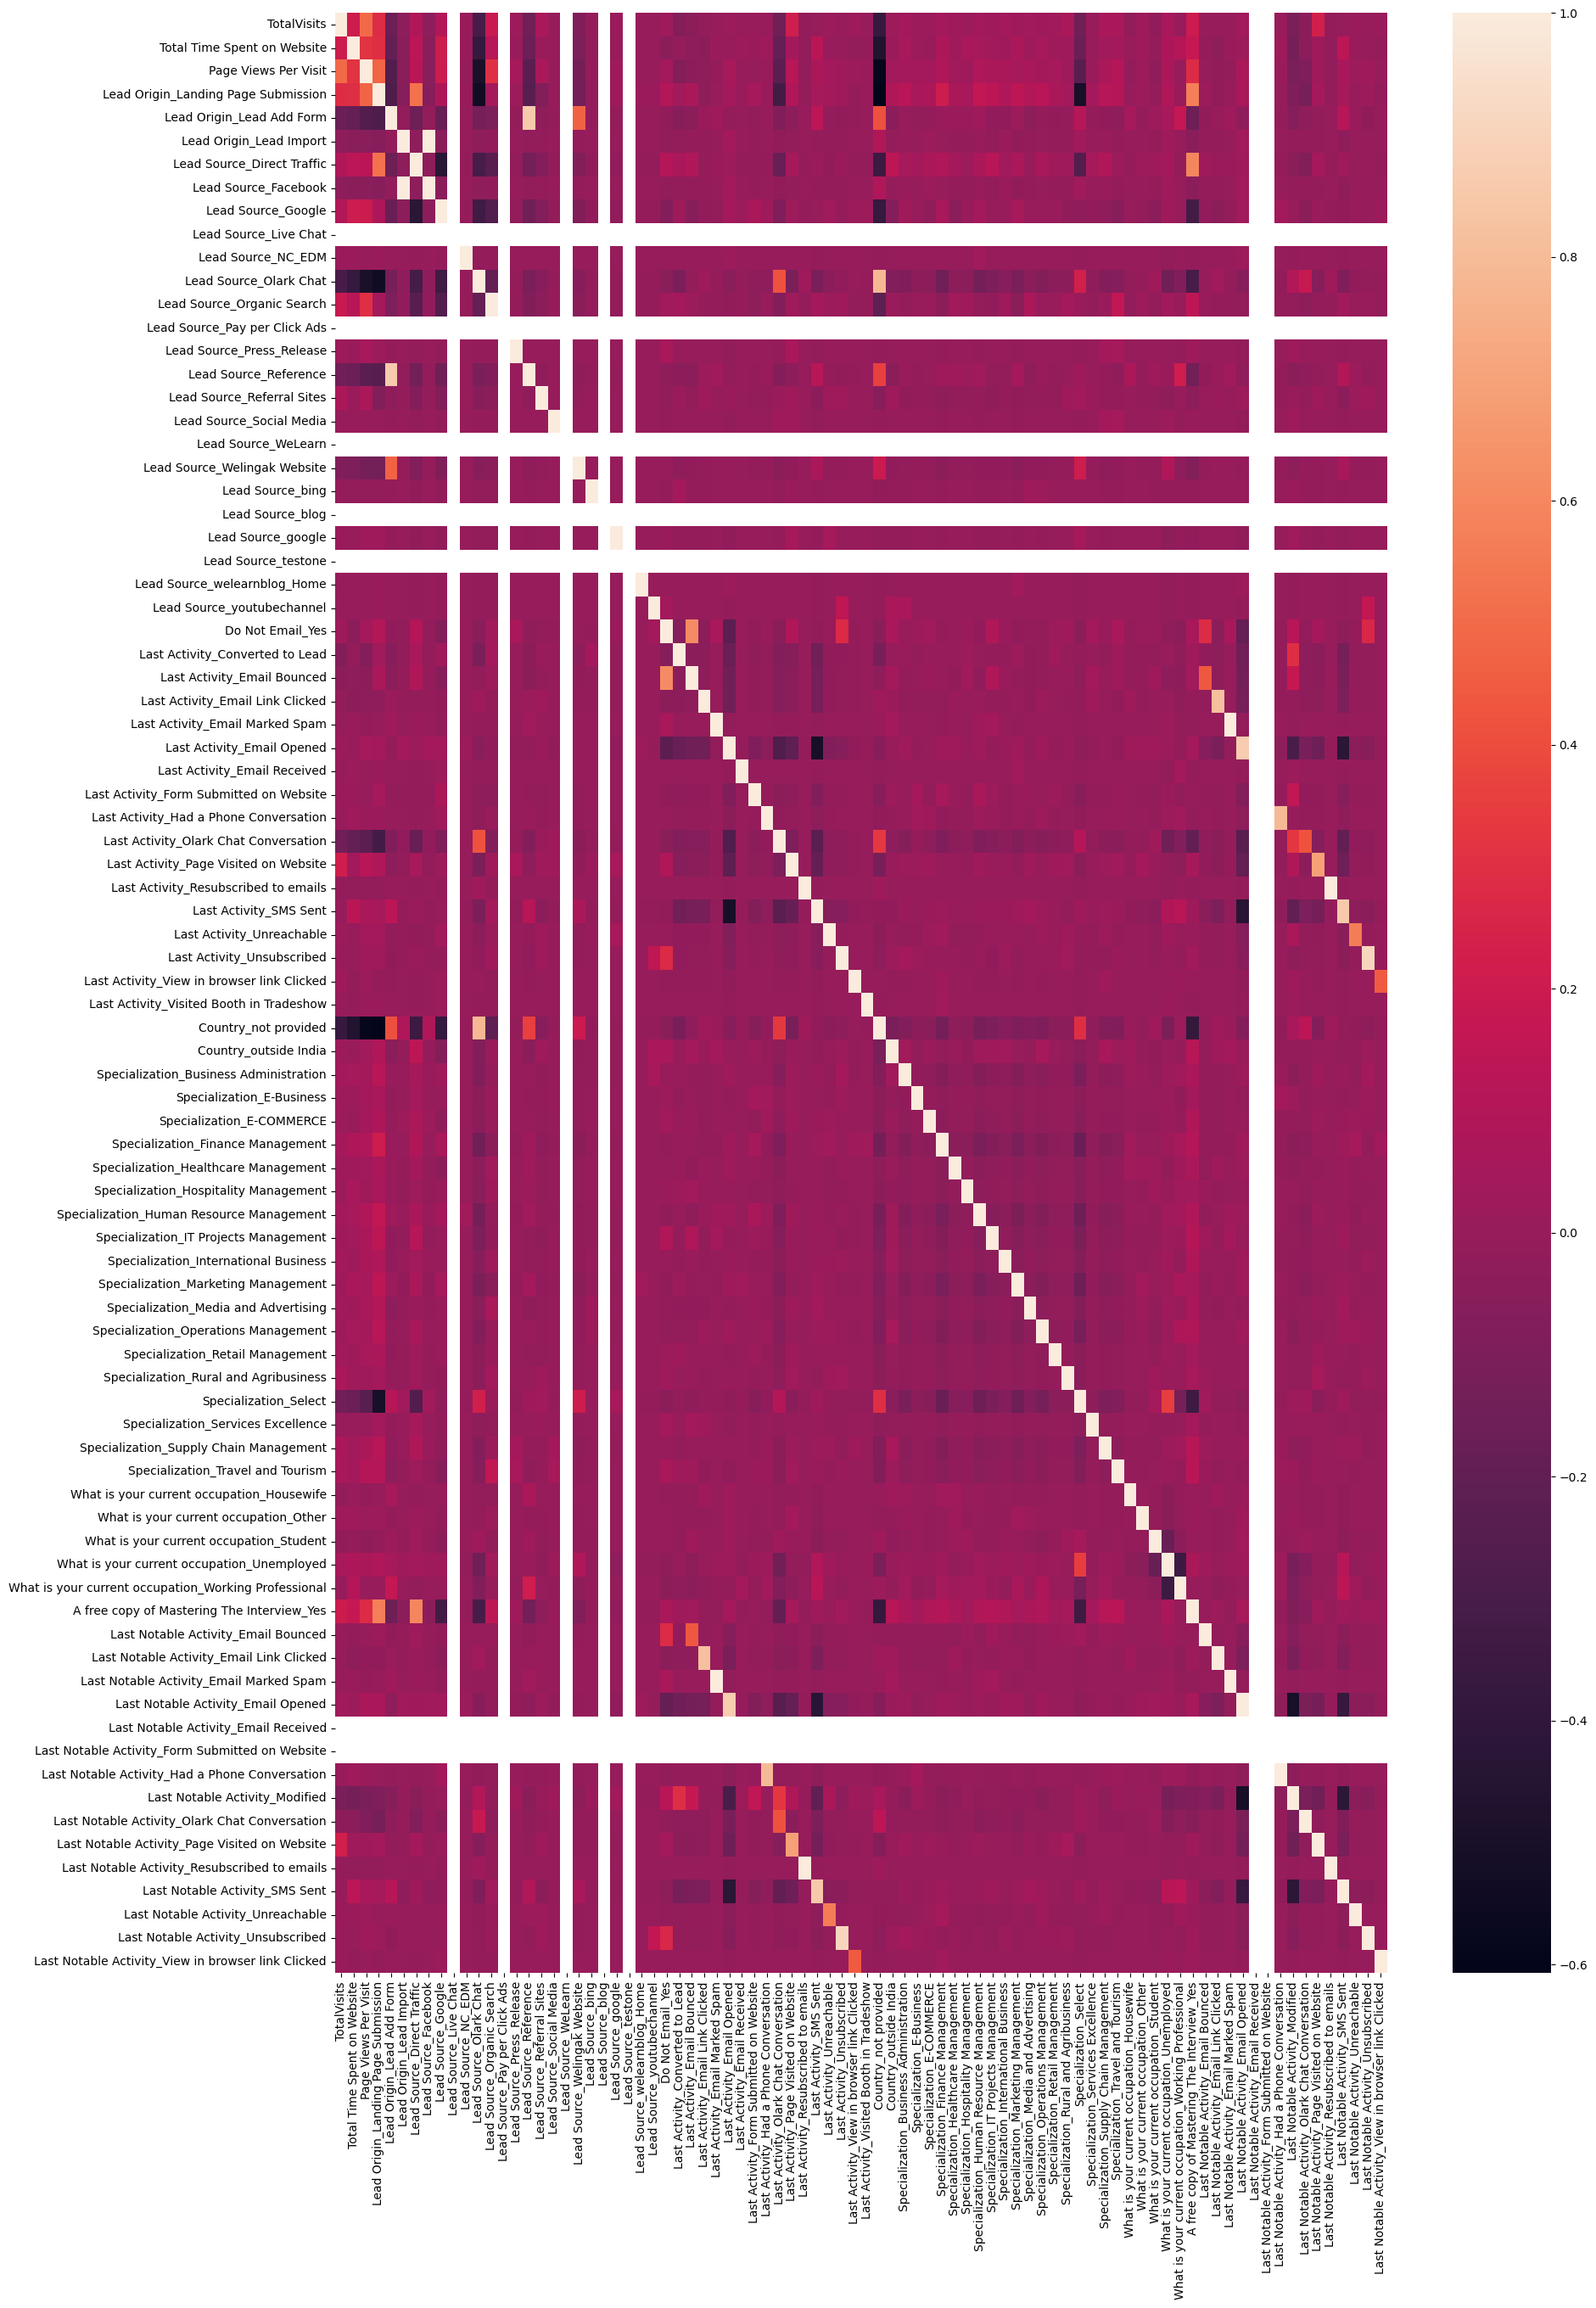

In [39]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

As you can see that there are a lot of variables present in the dataset which we cannot deal with. So we will first select a small set of features from the large pool of variables using RFE.

### Model Building

In [40]:
logRegression = LogisticRegression()

In [41]:
rfe = RFE(logRegression,n_features_to_select= 15) # Starting with 15 variables intially
rfe = rfe.fit(X_train, y_train)

In [42]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 61),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 59),
 ('Lead Source_Direct Traffic', False, 21),
 ('Lead Source_Facebook', False, 55),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Live Chat', False, 64),
 ('Lead Source_NC_EDM', False, 10),
 ('Lead Source_Olark Chat', False, 54),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Pay per Click Ads', False, 67),
 ('Lead Source_Press_Release', False, 51),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Social Media', False, 11),
 ('Lead Source_WeLearn', False, 68),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 49),
 ('Lead Source_blog', False, 66),
 ('Lead Source_google', False, 29),
 ('Lead Source_testone', False, 70),
 ('Lead Source_welearnblog_Home', False, 50)

In [43]:
# Extracting all columns that rfe support and don't support
rfe_col = X_train.columns[rfe.support_]
rfe_col_unsupported = X_train.columns[~rfe.support_]
rfe_col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Country_not provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified'],
      dtype='object')

- Next, we access the modal with stastmodal for p-value and VIF analysis

In [44]:
# Selecting columns selected by RFE
X_train = X_train[rfe_col]

In [45]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.3
Date:                Sun, 13 Oct 2024   Deviance:                       5272.5
Time:                        21:15:45   Pearson chi2:                 6.73e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3919
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0582      0.092    -11.441      0.000      -1.239      -0.877
TotalVisits                                              9.5951      2.403      3.993      0.000       4.885      14.305
Total Time Spent on Website                              4.6711      0.168     27.858      0.000       4.342       5.000
Lead Origin_Lead Add Form                                3.1042      0.259     11.963      0.000       2.596       3.613
Lead Source_Welingak Website                             1.5007      0.762      1.970      0.049       0.008       2.993
Do Not Email_Yes                                        -1.4187      0.195     -7.272      0.000      -1.801      -1.036
Last Activity_Converted to Lead                         -1.3666      0.227     -6.011      0.000      -1.812      -0.921
Last Activity_Email Bounced                             -1.5776      0.410     -3.850      0.000      -2.381      -0.774
Last Activity_Olark Chat Conversation                   -1.9603      0.164    -11.974      0.000      -2.281      -1.639
Last Activity_Page Visited on Website                   -1.3847      0.153     -9.057      0.000      -1.684      -1.085
Country_not provided                                     1.3111      0.111     11.761      0.000       1.093       1.530
What is your current occupation_Working Professional     2.7916      0.193     14.455      0.000       2.413       3.170
Last Notable Activity_Email Link Clicked                -1.8560      0.256     -7.250      0.000      -2.358      -1.354
Last Notable Activity_Email Opened                      -1.3374      0.086    -15.553      0.000      -1.506      -1.169
Last Notable Activity_Had a Phone Conversation          21.8855   1.25e+04      0.002      0.999   -2.44e+04    2.45e+04
Last Notable Activity_Modified                          -1.3358      0.093    -14.427      0.000      -1.517      -1.154
========================================================================================================================
"""

In [46]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.astype(float).values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
14,Last Notable Activity_Modified,2.04
9,Country_not provided,1.99
4,Do Not Email_Yes,1.78
6,Last Activity_Email Bounced,1.77
2,Lead Origin_Lead Add Form,1.76
1,Total Time Spent on Website,1.67
7,Last Activity_Olark Chat Conversation,1.61
0,TotalVisits,1.60
12,Last Notable Activity_Email Opened,1.45
3,Lead Source_Welingak Website,1.33


The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation' since it has high p-value among others!


In [47]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [48]:
# Retrain the model with the Last Notable Activity_Had a Phone Conversation column removed
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.9
Date:                Sun, 13 Oct 2024   Deviance:                       5281.9
Time:                        21:15:45   Pearson chi2:                 6.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3910
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0433      0.092    -11.304      0.000      -1.224      -0.862
TotalVisits                                              9.7050      2.406      4.034      0.000       4.989      14.421
Total Time Spent on Website                              4.6612      0.167     27.837      0.000       4.333       4.989
Lead Origin_Lead Add Form                                3.1056      0.260     11.965      0.000       2.597       3.614
Lead Source_Welingak Website                             1.5010      0.762      1.971      0.049       0.008       2.994
Do Not Email_Yes                                        -1.4282      0.195     -7.320      0.000      -1.811      -1.046
Last Activity_Converted to Lead                         -1.3679      0.227     -6.019      0.000      -1.813      -0.922
Last Activity_Email Bounced                             -1.5749      0.410     -3.844      0.000      -2.378      -0.772
Last Activity_Olark Chat Conversation                   -1.9640      0.164    -11.996      0.000      -2.285      -1.643
Last Activity_Page Visited on Website                   -1.3944      0.153     -9.121      0.000      -1.694      -1.095
Country_not provided                                     1.3050      0.111     11.707      0.000       1.087       1.524
What is your current occupation_Working Professional     2.7900      0.193     14.447      0.000       2.411       3.168
Last Notable Activity_Email Link Clicked                -1.8681      0.256     -7.300      0.000      -2.370      -1.367
Last Notable Activity_Email Opened                      -1.3501      0.086    -15.721      0.000      -1.518      -1.182
Last Notable Activity_Modified                          -1.3462      0.093    -14.553      0.000      -1.528      -1.165
========================================================================================================================
"""

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.astype(float).values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Modified,2.04
9,Country_not provided,1.99
4,Do Not Email_Yes,1.78
6,Last Activity_Email Bounced,1.77
2,Lead Origin_Lead Add Form,1.76
1,Total Time Spent on Website,1.67
7,Last Activity_Olark Chat Conversation,1.61
0,TotalVisits,1.60
12,Last Notable Activity_Email Opened,1.45
3,Lead Source_Welingak Website,1.33


- Lets remove 'Lead Source_Welingak Website' column as well as it has somewhat high p-value. Even though it's below 0.05, it has 0.049 value so it's close to 0.05. Lets remove it

In [50]:
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

In [51]:
# Retrain the model with the Lead Source_Welingak Website column removed
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm3.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.7
Date:                Sun, 13 Oct 2024   Deviance:                       5287.3
Time:                        21:15:45   Pearson chi2:                 6.92e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3905
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0434      0.092    -11.304      0.000      -1.224      -0.862
TotalVisits                                              9.6981      2.407      4.029      0.000       4.980      14.416
Total Time Spent on Website                              4.6625      0.167     27.839      0.000       4.334       4.991
Lead Origin_Lead Add Form                                3.3915      0.245     13.866      0.000       2.912       3.871
Do Not Email_Yes                                        -1.4150      0.194     -7.300      0.000      -1.795      -1.035
Last Activity_Converted to Lead                         -1.3660      0.227     -6.012      0.000      -1.811      -0.921
Last Activity_Email Bounced                             -1.5860      0.409     -3.875      0.000      -2.388      -0.784
Last Activity_Olark Chat Conversation                   -1.9631      0.164    -12.001      0.000      -2.284      -1.642
Last Activity_Page Visited on Website                   -1.3953      0.153     -9.129      0.000      -1.695      -1.096
Country_not provided                                     1.3058      0.111     11.713      0.000       1.087       1.524
What is your current occupation_Working Professional     2.7854      0.193     14.410      0.000       2.407       3.164
Last Notable Activity_Email Link Clicked                -1.8689      0.256     -7.307      0.000      -2.370      -1.368
Last Notable Activity_Email Opened                      -1.3505      0.086    -15.731      0.000      -1.519      -1.182
Last Notable Activity_Modified                          -1.3480      0.092    -14.581      0.000      -1.529      -1.167
========================================================================================================================
"""

##### Let's check the VIFs again

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.astype(float).values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,2.04
8,Country_not provided,1.99
3,Do Not Email_Yes,1.78
5,Last Activity_Email Bounced,1.77
1,Total Time Spent on Website,1.67
6,Last Activity_Olark Chat Conversation,1.61
0,TotalVisits,1.60
11,Last Notable Activity_Email Opened,1.45
2,Lead Origin_Lead Add Form,1.42
4,Last Activity_Converted to Lead,1.24


Now, both the p-values and VIFs seem decent enough for all the variables as all the p-values are below 0.05. So we can finalise this model.

### Model Evaluation

In [53]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm.astype(float))
y_train_pred[:10]

1618    0.909366
7718    0.181620
2273    0.909366
835     0.776572
8945    0.045277
671     0.035290
6610    0.251980
1654    0.148504
7432    0.839495
8721    0.151430
dtype: float64

In [54]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.90936574, 0.1816205 , 0.90936574, 0.77657192, 0.04527706,
       0.03529025, 0.25198034, 0.14850413, 0.83949471, 0.15143048])

In [55]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.909366
1,0,0.181620
2,1,0.909366
3,1,0.776572
4,0,0.045277


In [56]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted
0,0,0.909366,1
1,0,0.181620,0
2,1,0.909366,1
3,1,0.776572,1
4,0,0.045277,0


### Evaluation metrics

#### 1. Confusion matrix 

In [57]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3500  441]
 [ 728 1682]]


In [58]:
# The matrix is evaluated as follows
#        Predicted   not_converted    converted
# Actual
# not_converted          3500            441
# converted              728             1682  

In [59]:
#### 2. Accuracy

In [60]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8159344985041725


#### The accuracy is 81.6% which is good! 

#### 3. Precision and Recall

In [61]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted) #Precision

0.7922750824305228

In [62]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted) # Recall

0.6979253112033195

#### 4. Sensitivity and Specificity

In [63]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [64]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6979253112033195

In [65]:
# Let us calculate specificity
TN / float(TN+FP)

0.8880994671403197

#### 5. Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [66]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

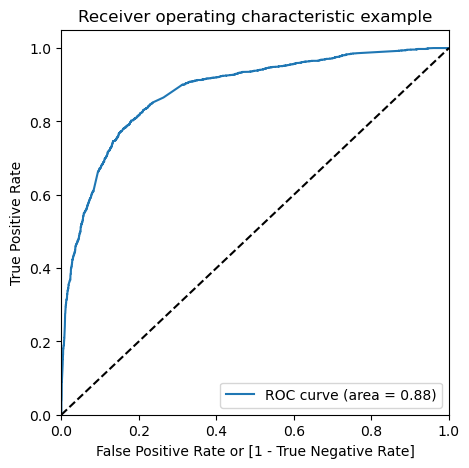

In [67]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

##### Area under ROC curve is 0.88 which is very good!! So we have good modal! Lets find the optimal cutoff!

#### 6. Finding optimal cut off point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [68]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.909366,1,1,1,1,1,1,1,1,1,1,1
1,0,0.181620,0,1,1,0,0,0,0,0,0,0,0
2,1,0.909366,1,1,1,1,1,1,1,1,1,1,1
3,1,0.776572,1,1,1,1,1,1,1,1,1,0,0
4,0,0.045277,0,1,0,0,0,0,0,0,0,0,0


In [69]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379468  1.000000  0.000000
0.1   0.1  0.562746  0.970539  0.313372
0.2   0.2  0.742875  0.913693  0.638417
0.3   0.3  0.803653  0.831535  0.786602
0.4   0.4  0.818296  0.773029  0.845978
0.5   0.5  0.815934  0.697925  0.888099
0.6   0.6  0.798142  0.588797  0.926161
0.7   0.7  0.782869  0.509129  0.950266
0.8   0.8  0.761927  0.417842  0.972342
0.9   0.9  0.724768  0.292531  0.989089


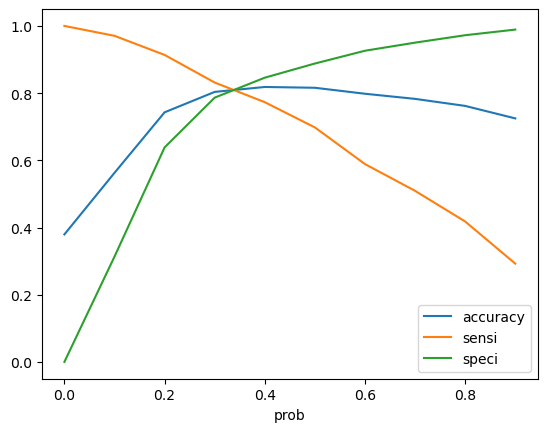

In [70]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the graph it is visible that the optimal cut off is at 0.35.


In [71]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.909366,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.181620,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.909366,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.776572,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.045277,0,1,0,0,0,0,0,0,0,0,0,0


In [72]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8036529680365296

In [73]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3100,  841],
       [ 406, 2004]])

In [74]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted) # Precision

0.7922750824305228

In [75]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted) # Recall

0.6979253112033195

In [76]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [77]:
TP / float(TP+FN) # sensitivity

0.8315352697095436

In [78]:
TN / float(TN+FP) # specificity

0.786602385181426

The Accuracy, precision and recall are not effected after altering the cutoff. So out modal is stable

#### The value of probability*100 can be taken as lead score for giving scoring to the customer who visit the website. The people with higher probability value(score) will be more likely to be converted compared to ones wirh lower value. The cut off score which we can target is 35 obtained in above analysis

### Making Predictions on the Test Set

In [79]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [80]:
# Fetching all the columns in the final train model
col = X_train.columns

In [81]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Country_not provided,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified
7428,1.0,0.000000,0.000000,False,False,False,False,True,False,True,False,False,False,True
3574,1.0,0.015936,0.050616,False,False,False,False,False,False,False,False,False,True,False
7363,1.0,0.000000,0.000000,False,False,False,False,False,False,True,False,False,True,False
2032,1.0,0.035857,0.056338,False,False,False,False,False,False,False,False,False,True,False
101,1.0,0.000000,0.000000,False,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,1.0,0.011952,0.753521,False,False,False,False,False,False,False,False,False,False,True
519,1.0,0.000000,0.000000,False,False,False,False,False,False,True,False,False,False,True
4552,1.0,0.000000,0.000000,False,False,False,False,False,False,True,False,False,True,False
336,1.0,0.011952,0.195863,False,False,False,False,False,False,False,False,False,False,True


Making predictions on the test set

In [82]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm.astype(float))

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.045277
1,0,0.118849
2,0,0.251980
3,1,0.143871
4,1,0.252456


In [83]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.045277,0
1,0,0.118849,0
2,0,0.251980,0
3,1,0.143871,0
4,1,0.252456,0
...,...,...,...
2718,1,0.775180,1
2719,1,0.252456,0
2720,0,0.251980,0
2721,0,0.203870,0


In [84]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8064634594197576

#### Total accuracy on test dataset is 80.6 which is good!

In [85]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1381,  317],
       [ 210,  815]])

In [86]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted) # Precision

0.7922750824305228

In [87]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted) # Recall

0.6979253112033195

In [88]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [89]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7951219512195122

In [90]:
# Let us calculate specificity
TN / float(TN+FP)

0.8133097762073027

- With the current cut off as 0.35 we have Precision around 79.5% and Recall around 81.33% which is very good!!


## Assigning lead scores

In [91]:
y_pred_final['leadScores'] = y_pred_final.Conversion_Prob.map(lambda x: round(x*100,2))
y_pred_final

,Converted,Conversion_Prob,final_predicted,leadScores
0,0,0.045277,0,4.53
1,0,0.118849,0,11.88
2,0,0.251980,0,25.20
3,1,0.143871,0,14.39
4,1,0.252456,0,25.25
...,...,...,...,...
2718,1,0.775180,1,77.52
2719,1,0.252456,0,25.25
2720,0,0.251980,0,25.20
2721,0,0.203870,0,20.39


 - So we have assigned a lead score between 0 and 100 to each of the leads which can be used by the company. A higher score would mean that the lead is most likely to convert whereas a lower score would mean that the lead will mostly not get converted. The cut off the company can look for is 35. People with above 35 score will highly likely to be converted and company can invest on these set!
   

## Conclusion

The variables that mattered the most in the potential buyers are (In descending order) :

- The total time spend on the Website.
- Total number of visits.
- When the last activity was:
- - Modified
  - Page Visited on Website
  - Olark chat conversation
  - Email Opened
  - Email Link Clicked
- When their current occupation is as a working professional.

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses
